# Supervised Learning

Supervised learning algorithms are trained using LABELED examples, such as input where the desired output is known

Example: A segment of text could be labeled spam vs legitimate, positive or negative movie review

commonly used in applications where historical data predicts likely future events

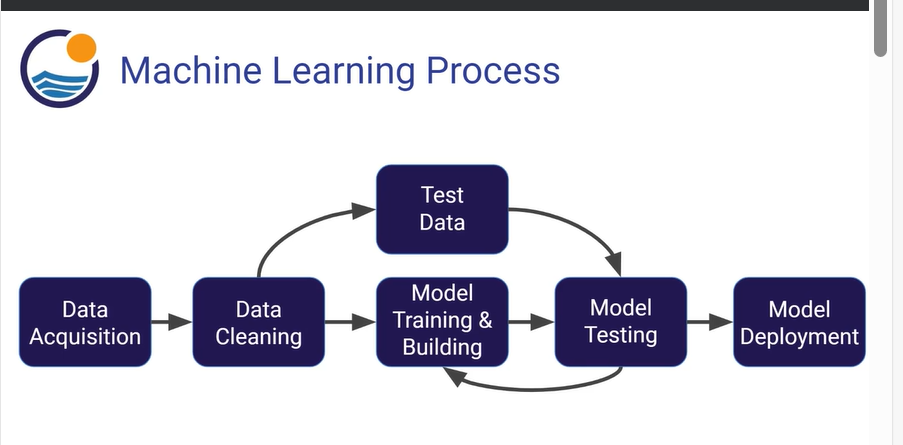

key issue: is it fair to use our single split of the data to evaluate our models performance? After all, we were givne the chance to update the model parameters again and again.

To fix this issue, data if often split into 3 sets.

Training data - used to train model parameters

Validation data - used to determine what model hyperparameters to adjust

Test data - used to get some final performance metric

We will use a train / test split in this course

I can go back and perform another split to get 3 data sets if I want

## Evaluating Performace

#### FOR CLASSIFICATION MODELS

After ML process is complete, we use performance metrics to evaluate how our model did 
Two results: incorrect or correct (binary classification)

Key Classification Metrics 

- Accuracy: number of correct predictions made by model divided by total number of predictions. Works best if count of each option is balanced, if unbalanced then it isnt a good option

- Recall: Ability of a model to find all the relevant cases.   Defined as Number of true positives / (number or true negatives + number of false negatives)

- Precision: Ability of a classification model to identify only the relevant data points. Defined as the Number of True Positives / Number of True Positives + Number of False Positives 


- F1 Score: In cases where we want to find optimal blend of precision and recall. We use harmonic mean instead of simple average becuase it punishes extreme values. Formula Below.
A classifier with a precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1 score of 0.



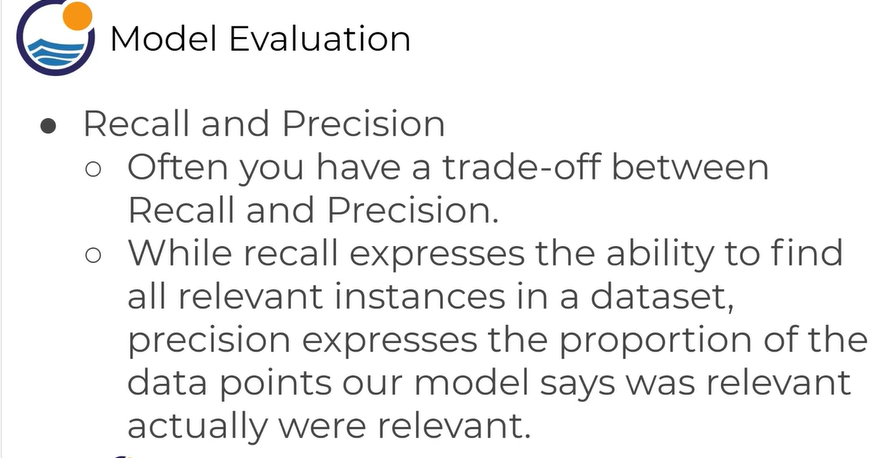

In precision/recall trade off, we need to decide if the model should focus on fixing False Positives vs False Negatives

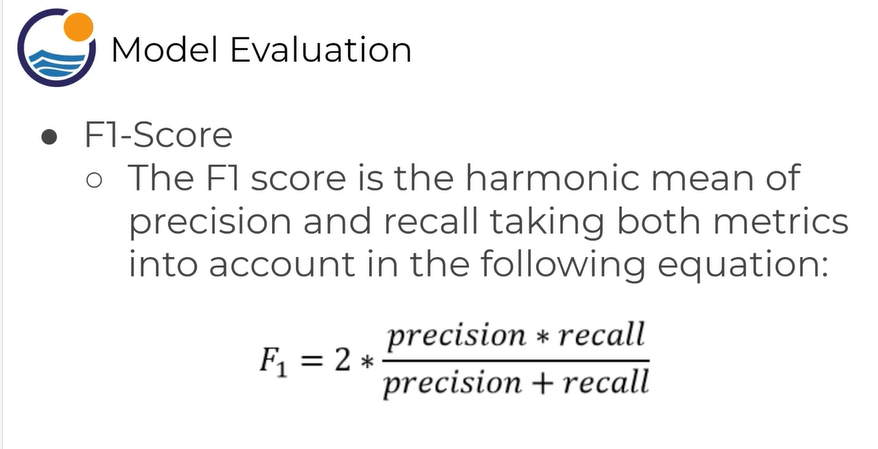

CONFUSION MATRIX

We can view all correctly classified vs incorrectly classified with a confusion matrix

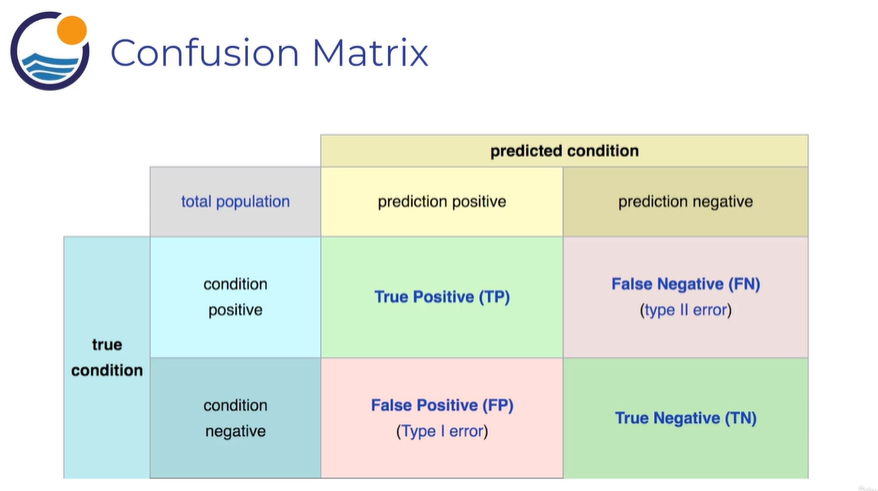

Other more advanced metrics below

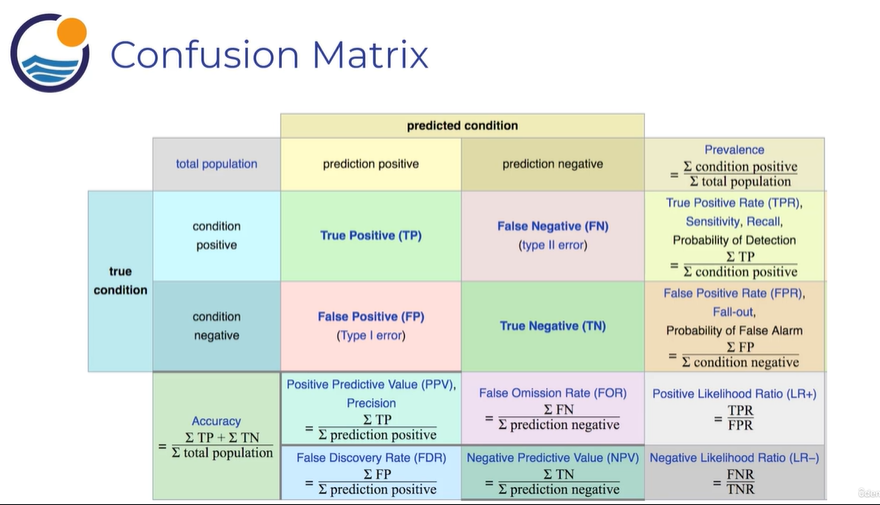

## Evaluating Performance

### Regression Error Metrics

Regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)

Recall and accuracy metrics don't make sense to use for regression

Example: Attempt to predict the price of a house given its features

Most common Evaluation Metrics for Regression:

- Mean Absolute Error: Mean of the absolute value of errors ( compare your predictions to true y label) This won't punish large errors. takes absolute value

- Mean Squared Error: Mean of the squared errors. Large errors are noted more with MAE. anything squared is postive

- Root Mean Square Error: This is the root of the mean of squared errors. Most popular.

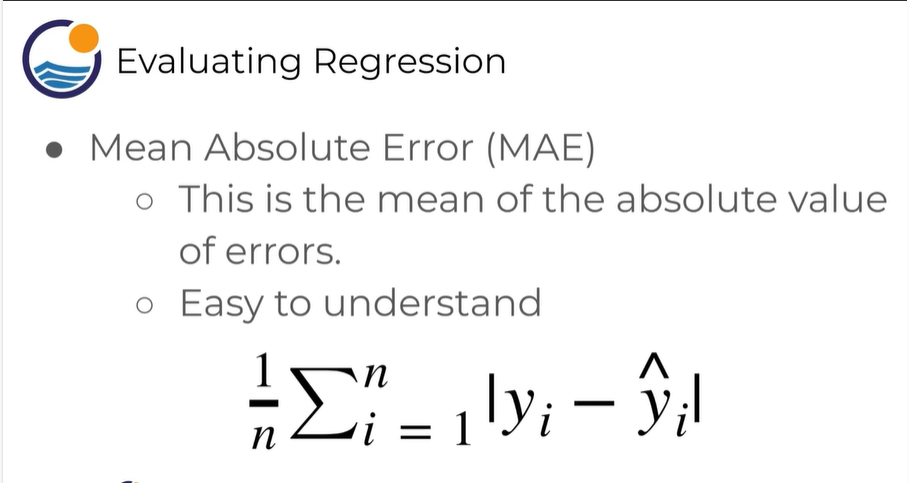

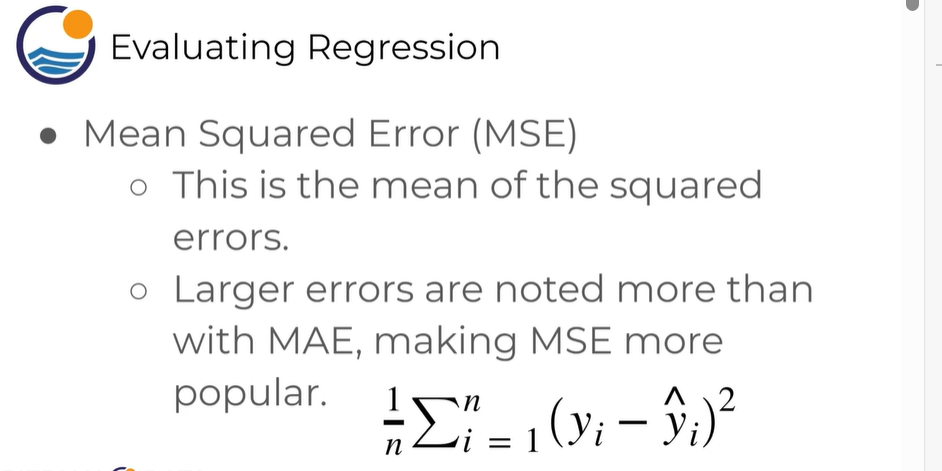

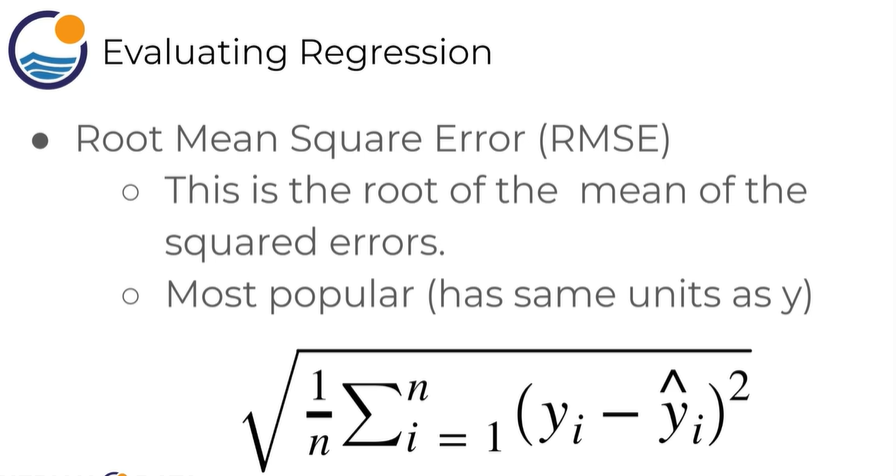

### ML in Python

We will be using the Scikit Learn Package

Its the most popular ML package for python and has a lot of built in algorithms

pip install scikit-learn at the command prompt

Every algorithm is exposed in scikit-learn via an 'Estimator'. All parameters of an estimator can be set when it is instantiated and have suitable defaults

high level
from sklearn.family import Model

specific example:   from sklearn.linear_model import LinearRegression

Once you have your model created with your parameters, it is time to fit your model on some data. We will split this data into a training set and a test set.

sklearn.cross validation is not valid anymore

use sklearn.model_selection now

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X,y = np.arange(10).reshape((5,2)), range(5)

In [3]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [6]:
list(y)

[0, 1, 2, 3, 4]

In [7]:
y_train

[3, 1, 4]

In [9]:
# now we can train/fit our model on the training data

# using the model.fit()  method
##     model.fit(X_train, y_train)

In [ ]:
# for supervised learnng model

# we use predict method

###    predictions = model.predict(X_test)

# then we evaluate our model by comparing our predictions to the correct values 

These are available on ALL ESTIMATORS.

model.fit()   - fit training data

for supervised learning applications, this accepts two arguements: the data x and the labels y...
model.fit(X,y)

for unsupervised learning applications, this accepts only a single arguement, the data X
model.fit(X)

Available on Supervised Estimators

model.predict()

given a trained model, predict the label of a new set of data. This method accepts one arguement, the new data X_new

model.predict_proba()

for classification problems, some estimators also provide this method, which returns the probablility that a new observation has each categorical label.

model.score()

for classification or regression problems, most estimators implement a score method. Scores between 0 and 1, larger score is better.

Avaialable on Unsupervised Estimators

model.predict() 
predicts labels on clustering algorithms

model.transform()
given an unsupervised model, transform new data into the new basis. accepts one arguement X_new and returns the new representation of the data based on the unsupervised model.

model.fit_transform
some estimators implement this method, which more efficiently performs a fit and a transform on the same data input


# LINEAR REGRESSION


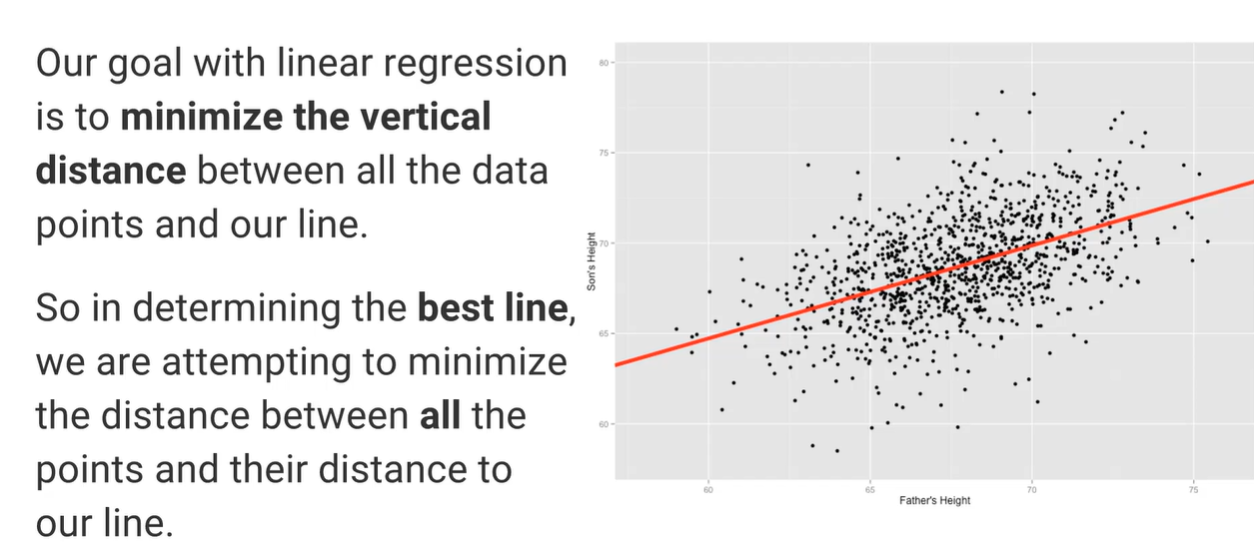

In [37]:
# housing data set to create a model to predict housing prices based off existing features

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
# can use seaborn plots to view data

# sns.pairplot(df)

C:\Users\D8ISU4A\AppData\Local\Temp\1\ipykernel_6648\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

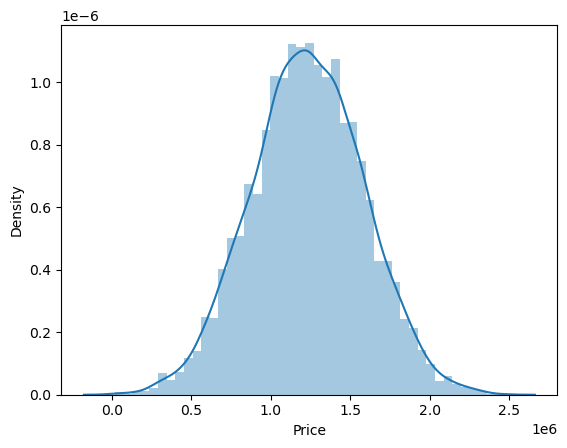

In [9]:
sns.distplot(df['Price'])

C:\Users\D8ISU4A\AppData\Local\Temp\1\ipykernel_6648\1513404931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


<Axes: >

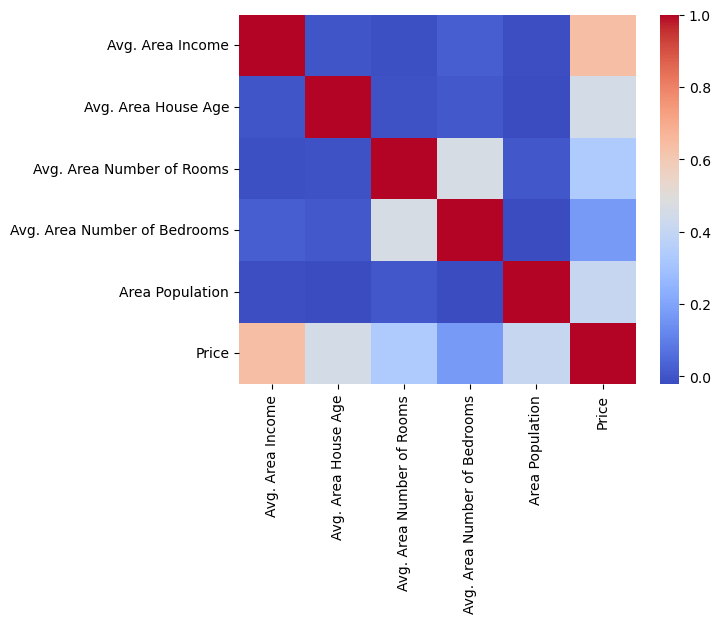

In [10]:
# heat map, pass in coorelation
sns.heatmap(df.corr(), cmap='coolwarm')

In [11]:
# get columns

df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
# pass in list of column names as X: those are my features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

# didnt include price which is the target variable, and address is string so it fails further below

In [13]:
# this will be my target variable, what i'm trying to predict
y = df['Price']

In [14]:
# use scikit learn for train test fit

# pass in X and y data (train and test for each), specify test size

from sklearn.model_selection import train_test_split

In [15]:
# tuple unpacking to grab training set, testing set
# test size is percent of data allocated to test size  .3 is common, random state is optional

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4, random_state=101)

In [16]:
# create and train the model

from sklearn.linear_model import LinearRegression

In [17]:
# instantiate
# we are creating a linear regression object

lm = LinearRegression()

In [18]:
###   lm. (clcik tab to look at all the available methods)

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# print the intercepts
print(lm.intercept_)

-2640159.7968525277


In [21]:
# check out the coefficents
# relates to each feature in the dataset
# relates to the column, or X_train

lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [22]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [23]:
# create a dataframe off these above

cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [24]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
# coeff for each feature. first one means if we hold all other variables fixed, a 1 unit increase in average area income is associated wtih a 21.52 dollar increase in housing price

# second one (area house age), a one unit increase in house age results in 164883 dollar increase in housing price.

#### picks back up down with predictions

In [46]:
# how to grab real data set from scikit-learn
# load_ then many options

from sklearn.datasets import load_diabetes

In [47]:
db = load_diabetes()

In [49]:
db.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [51]:
print(db['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## getting predictions from model above

In [25]:
predictions = lm.predict(X_test)

In [28]:
# these are the predicted pricing of the houses
predictions

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

In [29]:
# this is the correct house prices

y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

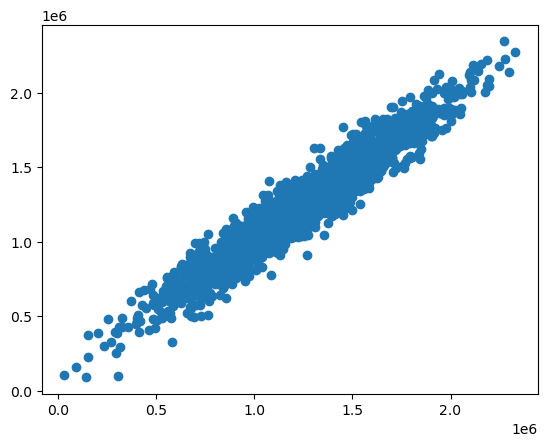

In [27]:
# how far off the predictions are from the actual housing prices
# visualize it with scatter plot
# we want it to be perfectly straight as possible

plt.scatter(y_test, predictions)

C:\Users\D8ISU4A\AppData\Local\Temp\1\ipykernel_6648\2228318890.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='Price', ylabel='Density'>

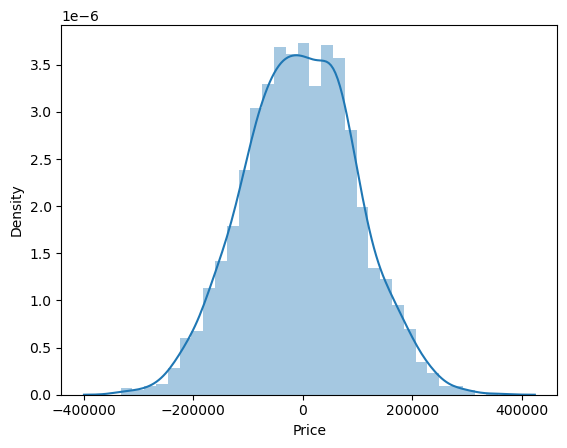

In [31]:
# create a histogram of the residuals

# residuals are the difference between the actual values (y_test) and predicted values (predictions)
# we want them to be normaly distributed

sns.distplot((y_test-predictions))

 now remember the three main regression evaluation metrics from above. we want to minimize these for best model

-mean absolute error
-mean squared error
-root mean squared error



In [32]:
# we can calculate these above with

from sklearn import metrics

In [33]:
# pass in actual housing prices and predictions

metrics.mean_absolute_error(y_test,predictions)

82288.22251914947

In [35]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209057

In [38]:
# root mean squared error
# pass in the above to np.sqrt()
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290935

### Bias Variance Trade-Off

For understanding your models performance.

It is the point where we are adding just noise by adding model complexity (flexibility).

The training error gown down as it has to, but the test error is starting to go up.

The model after the bias trade-off begins to overfit.

Common temptation for beginners is to continually add complexity to a model until it fits the training set too well. Doing this can cause a model to overfit to your training data and cause large errors on new data.

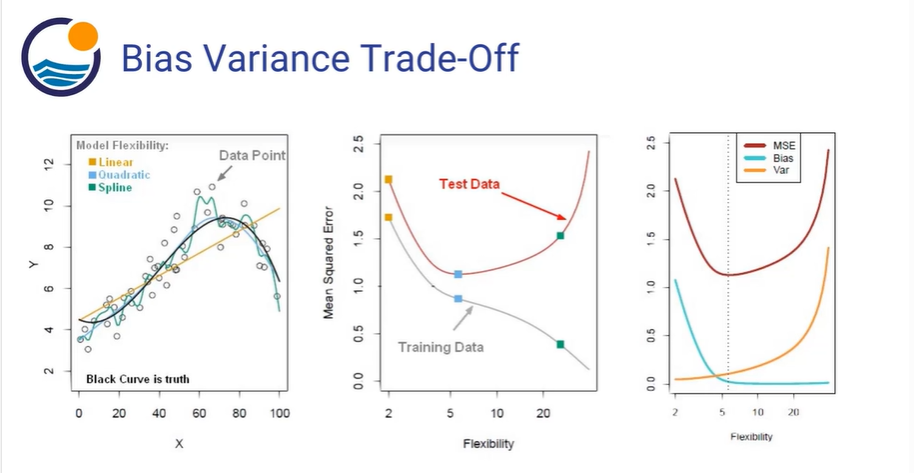

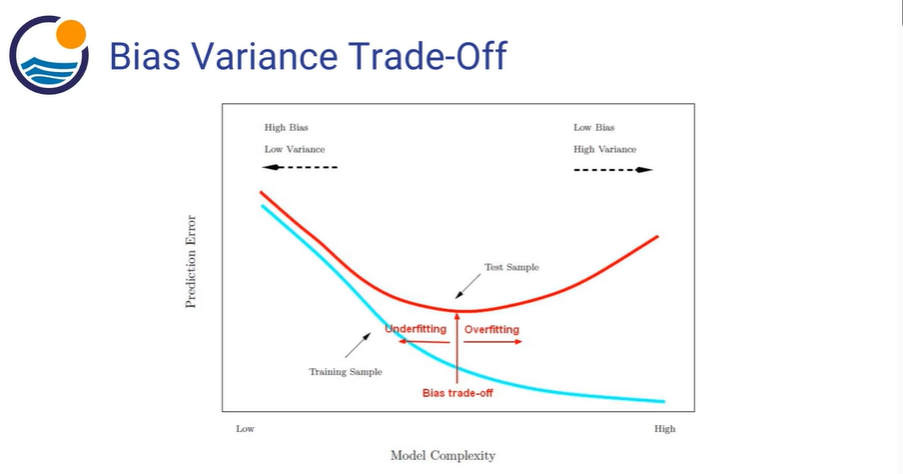

# Logistic Regression

method for Classification problems

Idetifying to which set of catagories a new data (observation) belongs to.

Allows us to predict discrete categories.

Convention for binary classification is to have two classes 0 and 1.

below is looking a training data for yellow lines for probability of defualing on loan, leads to values below 0%.

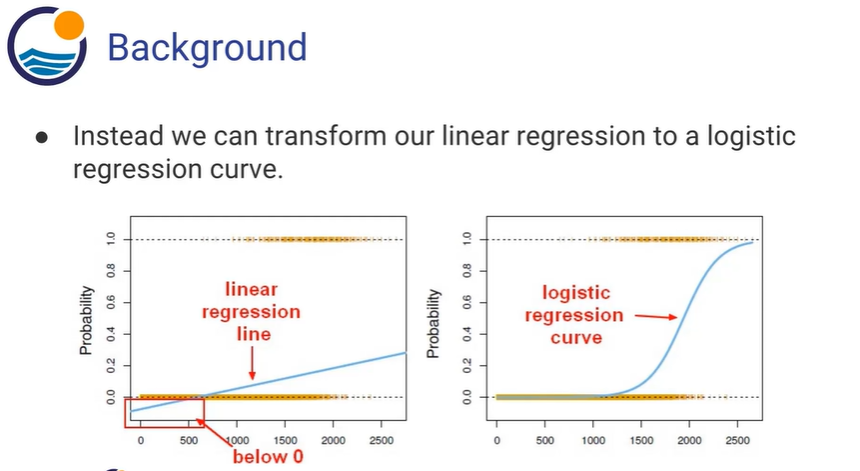

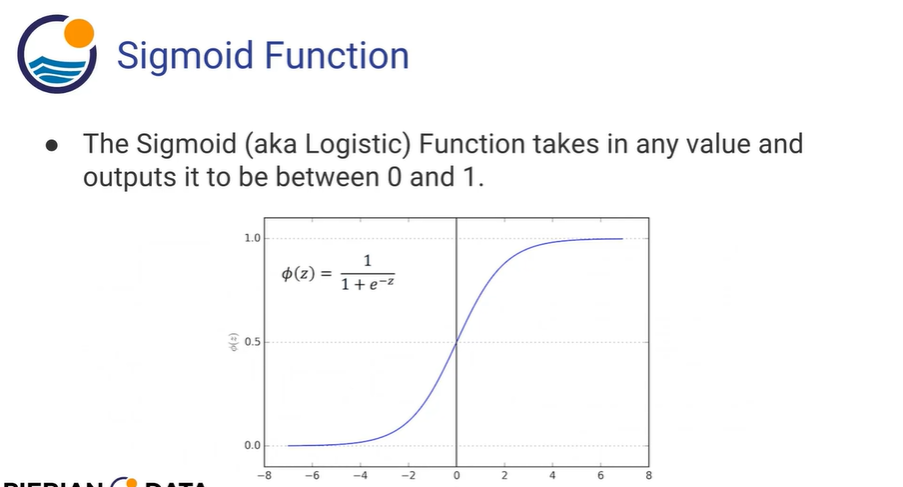

The .5 mark is 50%, anything above 50 percent or below 50 percent can be grouped into 2 groups

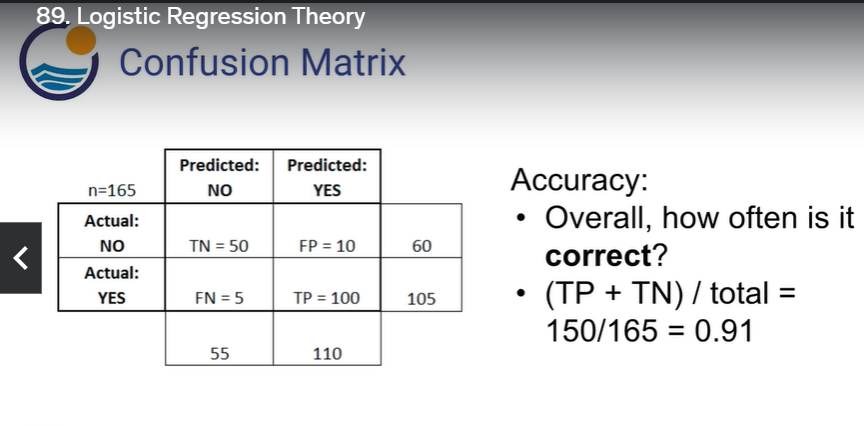

Accuracy is true postives + true negatives divided by the total (n)

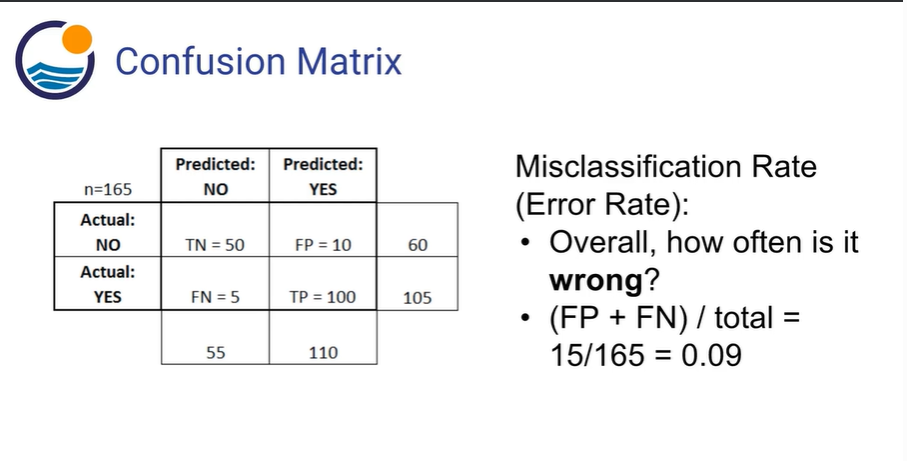

Misclassification Rate (Error Rate)

False Postives + False Negatives Divided By Total


Logistic Regression with Python 
Titanic Dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
train = pd.read_csv('titanic_train.csv')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

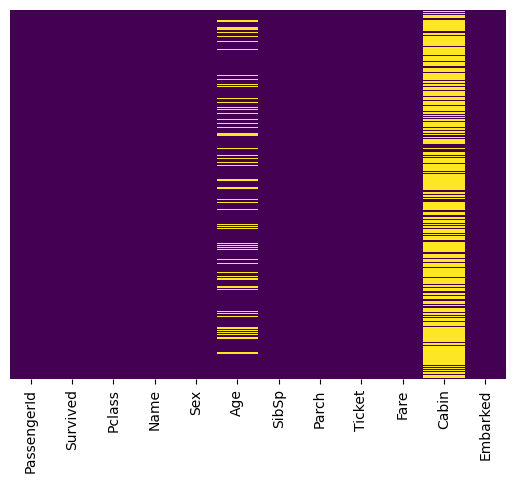

In [47]:
# find the nulls
# gives true if nulls

###   train.isnull()

# lets use a heat map

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
# set style to whitegrid

sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

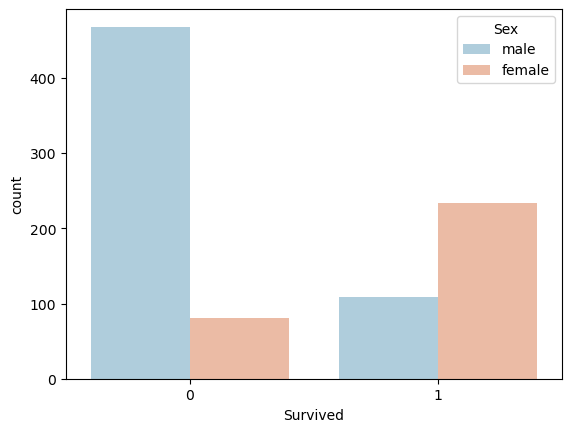

In [49]:
sns.countplot(x='Survived', hue='Sex', palette='RdBu_r', data=train)  # can add in hue='Sex' arguement  and palette='RdBu_r' for color

<Axes: xlabel='Survived', ylabel='count'>

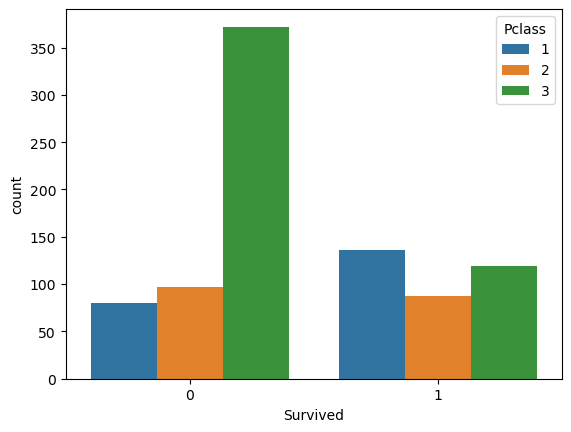

In [50]:
sns.countplot(x='Survived', hue='Pclass', data=train)

C:\Users\D8ISU4A\AppData\Local\Temp\1\ipykernel_6648\1943549730.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False, bins=30 )


<Axes: xlabel='Age'>

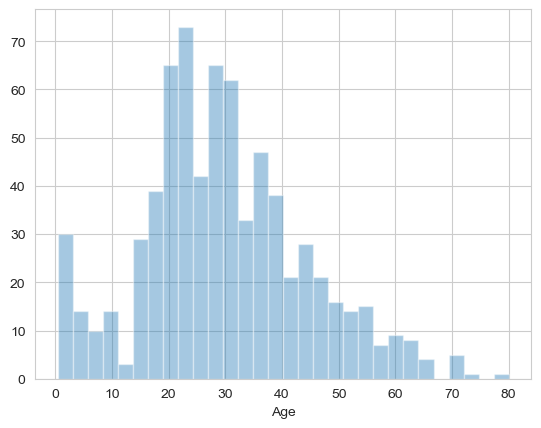

In [53]:
# age of ppl on titanic
# distribution plot
# this plot takes in an aray of values
# drop the NA values

sns.distplot(train['Age'].dropna(),kde=False, bins=30 )

# could have done
# train['Age'].plot.hist(bins=35)

<Axes: xlabel='SibSp', ylabel='count'>

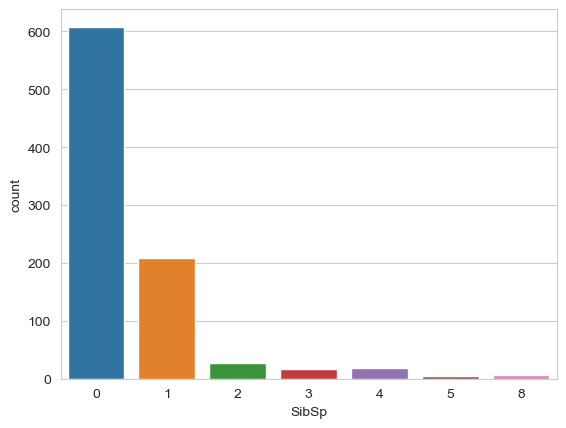

In [54]:
sns.countplot(x='SibSp', data=train)

<Axes: >

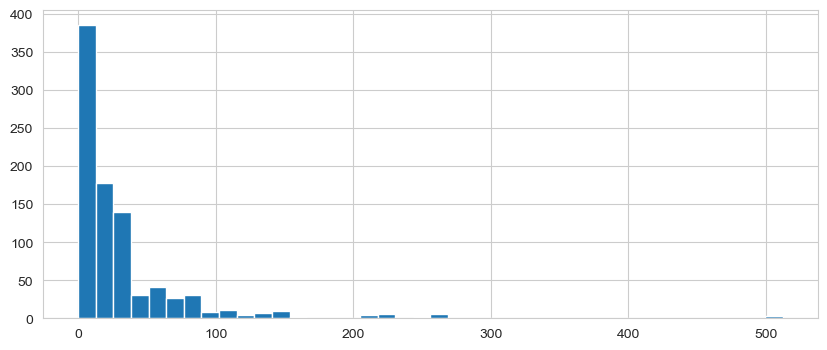

In [56]:
# how much ppl paid

train['Fare'].hist(bins=40, figsize=(10,4))

In [57]:
# if we wanted to do this with cufflinks cause its cooler

import cufflinks as cf

cf.go_offline()

train['Fare'].iplot(kind='hist',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

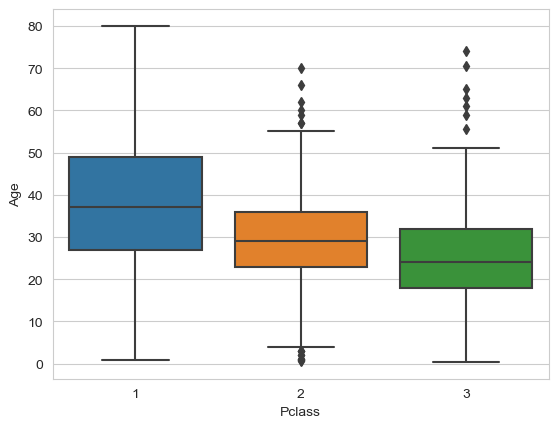

In [58]:
# lets fix the null values
# this is known as imputation
# lets check the average age by class, then fill in the nulls

sns.boxplot(x='Pclass', y='Age', data=train)

In [59]:
# lets build a function to apply imputation of age

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [61]:
# lets apply the function to the dataframe
# list of columns age and pclass here
# axis = 1 to apply it to columns

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

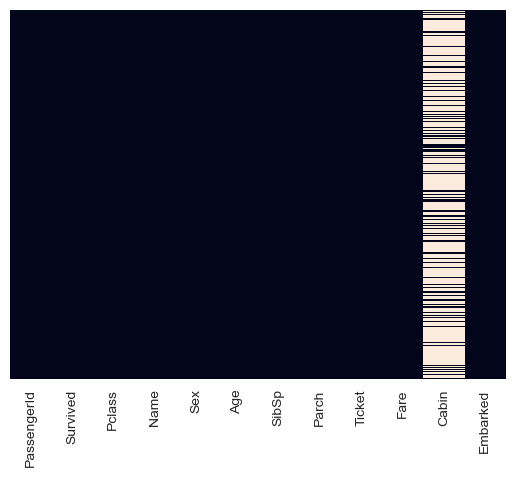

In [62]:
# check heat map again

sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [63]:
# lets drop the cabin column because too many nulls

train.drop('Cabin', axis=1, inplace=True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
# drop any more missing values

train.dropna(inplace=True)

In [66]:
# lets convert categorical features into 'dummy variables'
# ML algorithm wont be able to take in string of male or female 
# so we use 0 and 1

# we can do this with pandas
# get_dummies METHOD
# pass in column we want to convert

pd.get_dummies(train['Sex'])

# issue with below is if ML algorithms gets fed both columns it will predict 0 at female and 1 at male 
# 'perfect predictors of other column'
# issue is know as multi-coliniatity

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [69]:
# so we need to build this dataframe to fix it
# create an object of it

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [70]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [71]:
# create dataframe called embark
# do the same for 'embarked' column

embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [72]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
# lets concatinate these two new columns to our dataframe
# pass in a list of dataframes we want to pd.concat()

train = pd.concat([train,sex,embark], axis=1)

In [75]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [76]:
# now lets drop the columns we aren't going to use
# like name and ticket, can do feature engineering like get first digit of ticket, or mr/mrs of name
# pass in what we want to drop to a list


train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [78]:
# this looks great for ML algorithm
# data is numeric

train.tail()
# tail is last 5
# head is fist 5

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [82]:
# drop the passenger ID index because it doesn't do anything for us

train.drop('PassengerId', axis=1, inplace=True)

In [83]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [85]:
# now we are going to go through a train test split

X = train.drop('Survived', axis=1) # this is other features
y = train['Survived']    # y is the column we predict, 0 or 1

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
# now we need to create a model
# for logistic regression grab it from linear model family

from sklearn.linear_model import LogisticRegression

In [90]:
# create an instance of logistic regression model
# we will call out model logmodel

logmodel = LogisticRegression()

In [91]:
# now we TRAIN THE MODEL

logmodel.fit(X_train, y_train)

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [92]:
# call predictions of X_test dataset

predictions = logmodel.predict(X_test)

In [93]:
# now lets evaluate our model

from sklearn.metrics import classification_report

In [95]:
# classification report will show    recall,precesion, accuracy, f1 score 

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [97]:
# or you can run confusion matrix yourself

from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)